# Primer Examen 15%

## Ejercicio 1
El siguiente url entrega 100 artículos (ver`/work?rows=100` al final del url) de la revista con el ISSN: 1029-8479 correspondiente a "Journal of High Energy Physics" en formato JSON usando el API de CrossRef:

https://api.crossref.org/journals/1029-8479/works?rows=100

La base de datos con los 100 artículos que tambíen se puede cargar en otro DataFrame de Pandas, se encuentra anidada en la celda con fila `'items'` y columna `'messages'` la cual se puede obtener con el método `.loc['items','message']` del DataFrame original.

Obtenga la lista de DOIs para los artículos de Alessandro Strumia en esa base de datos anidada

## Ejercicio 2
2a) Genere un polinomio de numpy con 7 raices aleatorias entre 1 y 10

2b) Encuentre los puntos críticos del polinomio: las raices de la derivada el polinomio.

2c) Con alguna de los métodos para encontrar mínimos compruebe que el punto crítico de menor (mayor) valor corresponde al mínimo (máximo) global del polinomio

2d) Grafique el polinomío inclueyendo los puntos asociados a las raices.

Punto 1.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize

In [4]:
df = pd.read_json('https://api.crossref.org/journals/1029-8479/works?rows=100') # leo el archivo y lo convierto en un achivo de pandas
df

,status,message-type,message-version,message
facets,ok,work-list,1.0.0,{}
items,ok,work-list,1.0.0,"[{'indexed': {'date-parts': [[2020, 3, 30]], '..."
items-per-page,ok,work-list,1.0.0,100
query,ok,work-list,1.0.0,"{'start-index': 0, 'search-terms': None}"
total-results,ok,work-list,1.0.0,31567


In [12]:
df2 = pd.DataFrame(df.loc['items','message']) # creo un nuevo archivo de pandas con la informacion necesaria
df.columns # veo las claves del archivo


Index(['indexed', 'reference-count', 'publisher', 'issue', 'content-domain',
       'short-container-title', 'DOI', 'type', 'created', 'page', 'source',
       'is-referenced-by-count', 'title', 'prefix', 'volume', 'author',
       'member', 'published-online', 'container-title', 'deposited', 'score',
       'issued', 'references-count', 'journal-issue', 'URL', 'ISSN',
       'issn-type', 'published-print', 'update-policy', 'reference',
       'language', 'link', 'alternative-id', 'relation', 'subject',
       'assertion', 'article-number', 'update-to', 'license'],
      dtype='object')

In [38]:
 
df2.columns # veo las columnas del segundo data frame para identificar las claves 

Index(['indexed', 'reference-count', 'publisher', 'issue', 'content-domain',
       'short-container-title', 'DOI', 'type', 'created', 'page', 'source',
       'is-referenced-by-count', 'title', 'prefix', 'volume', 'author',
       'member', 'published-online', 'container-title', 'deposited', 'score',
       'issued', 'references-count', 'journal-issue', 'URL', 'ISSN',
       'issn-type', 'published-print', 'update-policy', 'reference',
       'language', 'link', 'alternative-id', 'relation', 'subject',
       'assertion', 'article-number', 'update-to', 'license'],
      dtype='object')

In [94]:
df2[(df2.author.astype(str).str.contains('Alessandro')& 
     df2.author.astype(str).str.contains('Strumia'))].DOI.to_list()# filto los datos de otra forma


['10.1088/1126-6708/2000/12/016', '10.1088/1126-6708/2001/11/048']

In [87]:
filt = df2.author.apply(lambda l : [d for d in l if d.get('given')=='Alessandro']
           ).apply(lambda l : [d for d in l if d.get('family')=='Strumia']).str[0].dropna().index.values# filtro los datos con una funcion



In [90]:
df2.loc[filt].DOI.to_list()# convierto el archivo a una lista

['10.1088/1126-6708/2000/12/016', '10.1088/1126-6708/2001/11/048']

Pnnto 2.

2.a

In [191]:
num = np.random.uniform(1, 10, 7)# genero los numeros aleatorios 
num


array([2.39995214, 6.8715381 , 3.72209869, 1.00471437, 2.58217397,
       8.73434367, 6.85873799])

In [192]:
poly = np.poly1d(num,r = True)# genero polinomio de numpy 
dfpoly = poly.deriv()# derivada del polimomio
print(poly)
print(dfpoly)

   7         6         5        4             3             2
1 x - 32.17 x + 418.6 x - 2834 x + 1.069e+04 x - 2.231e+04 x + 2.36e+04 x - 9540
   6       5        4             3             2
7 x - 193 x + 2093 x - 1.134e+04 x + 3.207e+04 x - 4.462e+04 x + 2.36e+04


2.b

In [193]:
raices = dfpoly.roots # encuentro las raices de la derivada 
print(raices)

[8.26542817 6.86514647 5.30638046 3.2806431  2.48794103 1.371797  ]


2.c


In [189]:
optimize.fmin_powell(poly,8)


Optimization terminated successfully.
         Current function value: -7.475810
         Iterations: 3
         Function evaluations: 52


array(5.54586555)

2.d

No handles with labels found to put in legend.


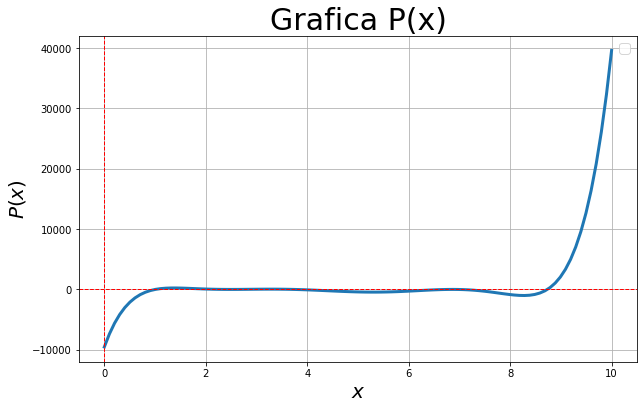

In [200]:
x = np.linspace(0,10,100)
Y = poly(x)

plt.figure(figsize=(10,6))
plt.plot (x,Y,lw=3,)
plt.title('Grafica P(x)',fontsize= 30)
plt.xlabel(r'$x$',fontsize= 20)
plt.ylabel(r'$P(x)$',fontsize= 20)
plt.axvline(0,c='r',lw=1,ls='--')
plt.axhline(0,c='r',lw=1,ls='--')
plt.legend(fontsize=14)
plt.grid()

el polinomio posee 5 raices reales y dos complejas

In [177]:
poly.roots

array([-2.25335103+0.j        ,  0.48868329+1.36653306j,
        0.48868329-1.36653306j, -0.86200777+1.07389552j,
       -0.86200777-1.07389552j])